In [6]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import matplotlib as mpt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as patches

import numpy as np
from scipy import optimize
import os


#from tqdm import tqdm, tqdm_notebook
from tqdm.autonotebook import tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import qcodes as qc
from qcodes.dataset.database import initialise_database
from qcodes.dataset.plotting import plot_by_id, get_data_by_id

D:\anaconda\lib\site-packages\qcodes\dataset\database.py:13: UserWarning: The module `qcodes.dataset.database` is deprecated.
Public features are available at the import of `qcodes`.
Private features are available in `qcodes.dataset.sqlite.*` modules.
  warnings.warn('The module `qcodes.dataset.database` is deprecated.\n'


In [3]:
def extract_Isw_R0 (Is,Vs):
    
        Isw = (np.max(Is) - np.min(Is) ) /2
        
        order = Is.argsort()
        
        Is, Vs = Is[order], Vs[order]
        
        n = len(Is)
        n_min, n_max = np.int(n/3), np.int(2*n/3)
        
        print(n_min, n_max)
          
        n_sl = slice(n_min, n_max)
        
        R0 = np.mean(np.diff(Vs[n_sl])) / np.mean(np.diff(Is[n_sl]))
        
        return Isw, R0

In [4]:
def extract_Isw_R0_by_id (idx):
    
    alldata = get_data_by_id(idx)
    
    Is = alldata[0][0]['data']
    Vs = alldata[0][1]['data']

        
    return extract_Isw_R0 (Is,Vs)

# 55B1

In [7]:
SAMPLE = '55B1'

qc.config["core"]["db_location"] = os.getcwd() + '\Experiments_{}.db'.format(SAMPLE)


<IPython.core.display.Javascript object>


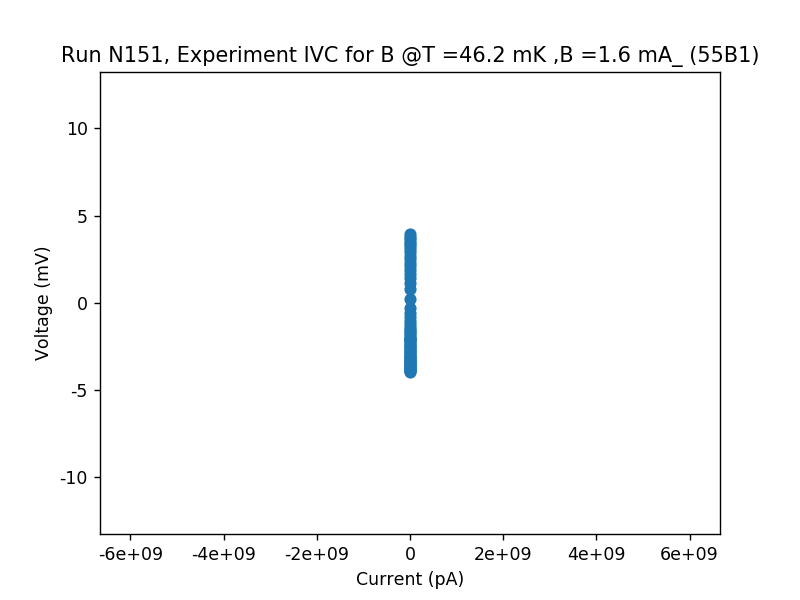

([<matplotlib.axes._subplots.AxesSubplot at 0x2d3f7e5c5f8>], [None])

In [8]:
plot_by_id(151)